In [1]:
import pandas as pd

data = pd.read_csv('data/dataframes/dataframe_final.csv', index_col=0)
label = pd.read_csv('data/dataframes/label_final.csv', index_col=0)

In [2]:
# mode=2인 데이터  mode = 1 로 대체

data['mode'] = data['mode'].replace(2, 1)
len(data[data['mode']==1])+len(data[data['mode']==0])

313187

In [132]:
import numpy as np
from datetime import datetime

def create_sequences(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    now_idx = ''
    for idx in dataframe.index:
        if now_idx == idx:
            continue
        X = dataframe.loc[dayformat].values
        y = label.loc[dayformat].values
        
        s = np.arange(X.shape[0])
        np.random.shuffle(s)
        X = X[s]
        y = y[s]
        
        Xs.append(X)
        ys.append(y)
        if idx != dayformat:
            dayformat = idx
        now_idx = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

def sequenceFlatter(X):
    temp = []
    for x in X:
        for i in x:
            temp.append(i)
    temp = np.array(temp)
    return temp

In [133]:
import numpy as np
from datetime import datetime

def create_sequences2022(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    for idx in dataframe.index:
        X = dataframe.loc[dayformat].values
        y = label.loc[dayformat].values
        
        s = np.arange(X.shape[0])
        np.random.shuffle(s)
        X = X[s]
        y = y[s]
        
        Xs.append(X)
        ys.append(y)
        if idx != dayformat:
            dayformat = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [134]:
data2022 = pd.read_csv('modeltest/2022.csv', index_col=0)
label2022 = pd.read_csv('modeltest/2022_label.csv', index_col=0)
X2022, y2022 = create_sequences2022(2022, data2022, label2022)
X2022 = sequenceFlatter(X2022)
y2022 = sequenceFlatter(y2022)

In [135]:
data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)

In [136]:
X2023, y2023 = create_sequences(2023, data2023, label2023)
X2023 = sequenceFlatter(X2023)
y2023 = sequenceFlatter(y2023)

In [137]:
X_train = X2022
X_test = X2023
y_train = y2022.flatten().astype('int32')
y_test = y2023.flatten().astype('int32')

In [128]:
# 60년 데이터 선형회귀
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

std = StandardScaler()
data_std = std.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data_std, label, test_size=0.3, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.0037742203499413485

In [129]:
# 2022데이터 선형회귀
std = StandardScaler()
data2022_std = std.fit_transform(X2022)

X_train, X_test, y_train, y_test = train_test_split(data2022_std, y2022, test_size=0.3, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.02920535879136643

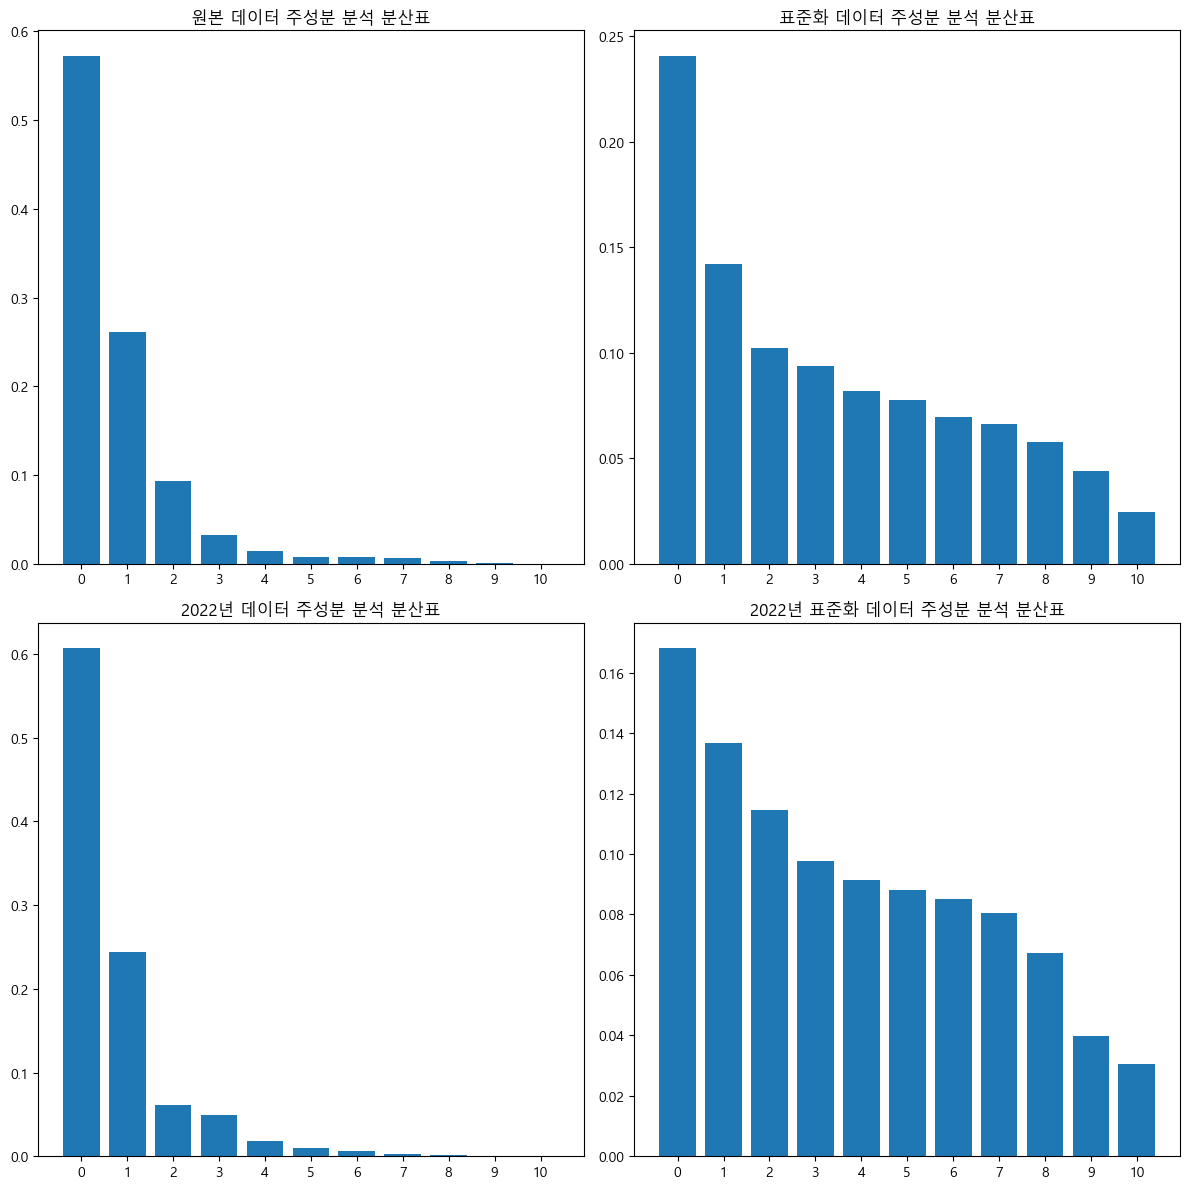

In [7]:
# 60년 데이터 주요 성분 분산 비교표
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 표준화
std = StandardScaler()
data_std = std.fit_transform(data)
data2022_std = std.fit_transform(data2022)

# PCA 적용
pca = PCA()

datasets = {
    '원본 데이터 주성분 분석 분산표': data,
    '표준화 데이터 주성분 분석 분산표': data_std,
    '2022년 데이터 주성분 분석 분산표': data2022,
    '2022년 표준화 데이터 주성분 분석 분산표': data2022_std
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (title, dataset) in zip(axes.flatten(), datasets.items()):
    pca.fit(dataset)
    explained_variance_ratio = pca.explained_variance_ratio_
    x = np.arange(len(explained_variance_ratio))
    ax.bar(x, explained_variance_ratio)
    ax.set_xticks(x)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [99]:
y_test.dtype

dtype('int32')

학습 세트 정확도 :  1.0
검증 세트 정확도 :  -0.997


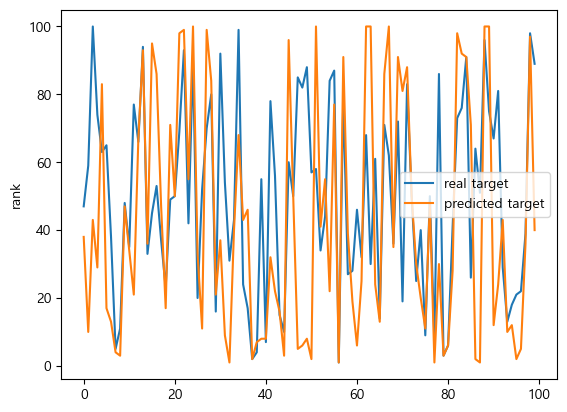

In [138]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  1.0
검증 세트 정확도 :  -0.945


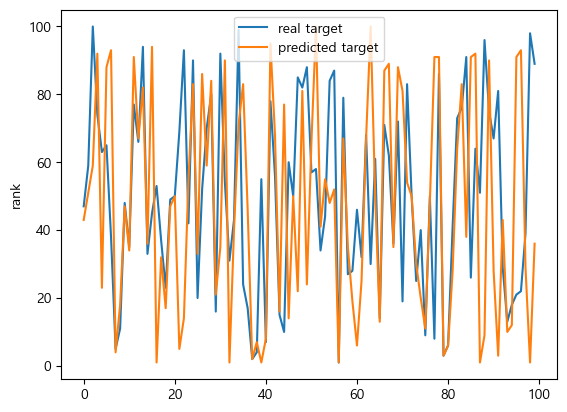

In [139]:
from sklearn.neighbors import KNeighborsRegressor

std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_std, y_train)

y_predicted = model.predict(X_test_std)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [140]:
# 원본데이터 PCA
from sklearn.neighbors import KNeighborsRegressor

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_pca, y_train)

y_predicted = model.predict(X_test_pca)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

학습 세트 정확도 :  1.0
검증 세트 정확도 :  -1.278


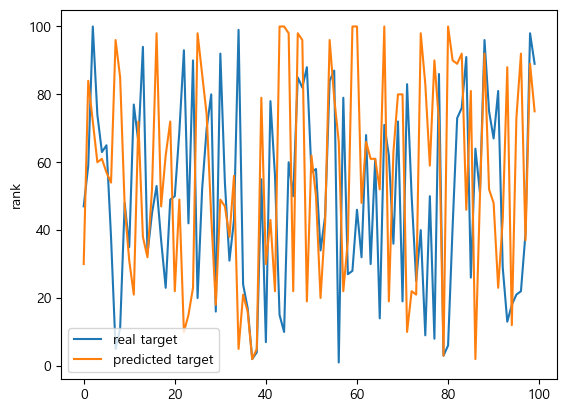

In [141]:
number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  1.0
검증 세트 정확도 :  -0.985


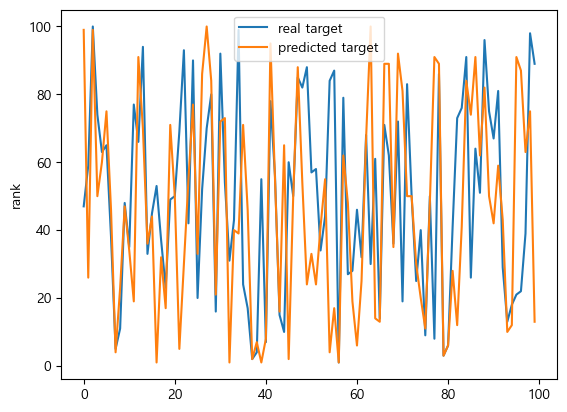

In [142]:
# 표준화 데이터
from sklearn.neighbors import KNeighborsRegressor

pca = PCA(n_components=7)
std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_pca, y_train)

y_predicted = model.predict(X_test_pca)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [31]:
# 표준화 pca 하이퍼파라미터 그리드 설정

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_pca, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", grid_search.best_params_)
print("최적의 검증 점수: ", grid_search.best_score_)

최적의 하이퍼파라미터:  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
최적의 검증 점수:  0.6983330206934315


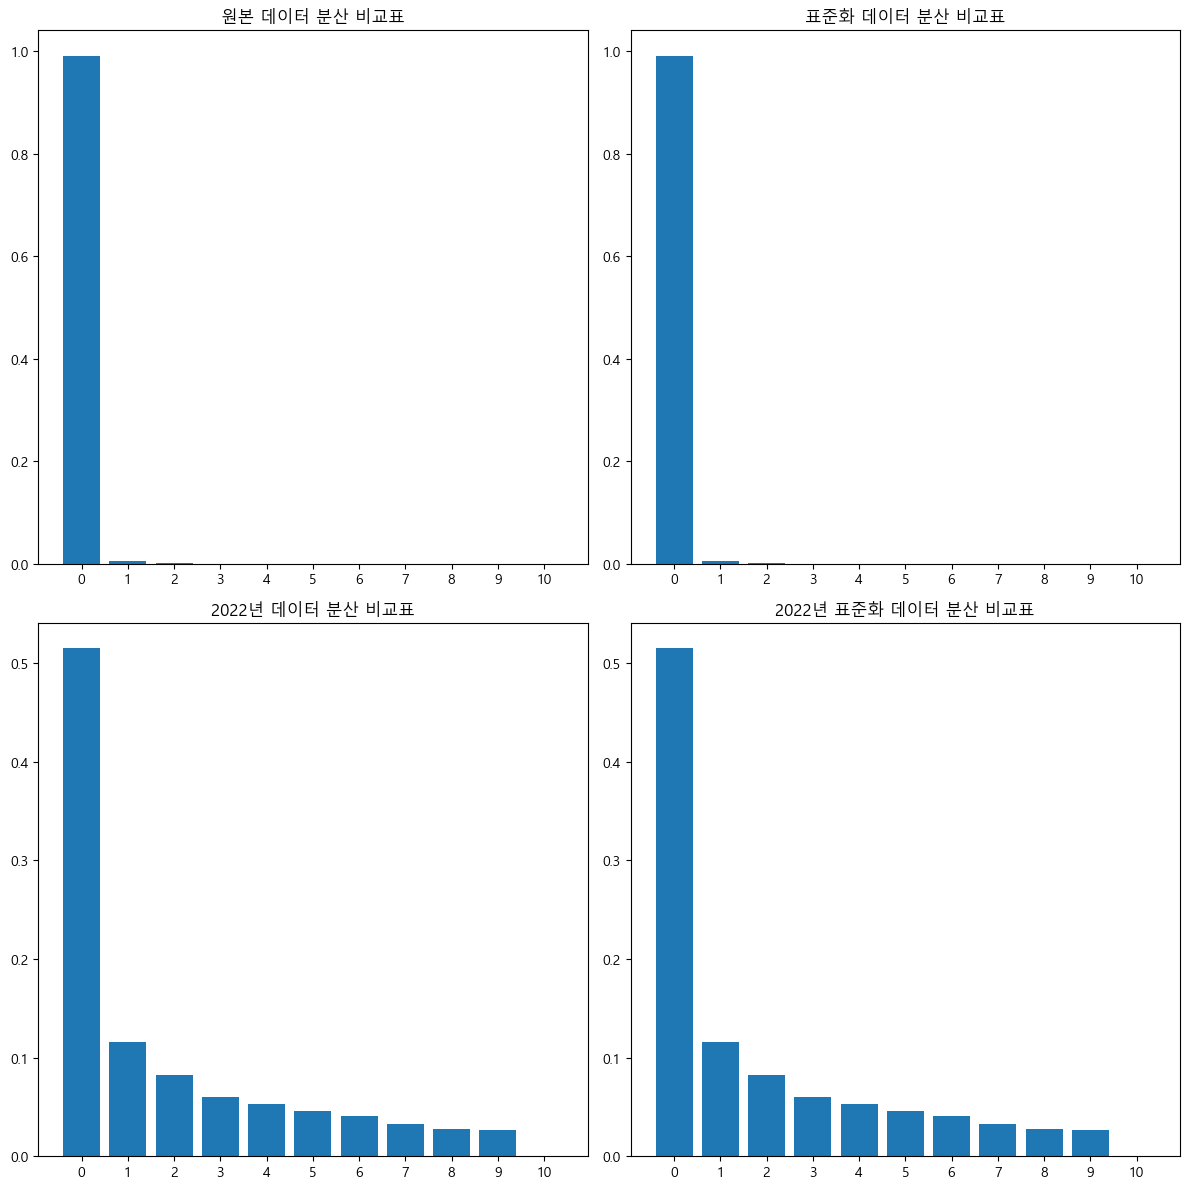

In [41]:
# lda 주요 성분 분산표
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 데이터 표준화
std = StandardScaler()
data_std = std.fit_transform(data)
data2022_std = std.fit_transform(data2022)

# LDA 적용
lda = LinearDiscriminantAnalysis()

datasets = {
    '원본 데이터 분산 비교표': (data, label),
    '표준화 데이터 분산 비교표': (data_std, label),
    '2022년 데이터 분산 비교표': (data2022, label2022),
    '2022년 표준화 데이터 분산 비교표': (data2022_std, label2022)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (title, (dataset, labels)) in zip(axes.flatten(), datasets.items()):
    lda.fit(dataset, labels.values.reshape(-1))  # labels를 numpy 배열로 변환 후 reshape
    explained_variance_ratio = lda.explained_variance_ratio_
    x = np.arange(len(explained_variance_ratio))
    ax.bar(x, explained_variance_ratio)
    ax.set_xticks(x)
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [143]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# LDA 적용
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# KNN 모델 적용
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))


학습 세트 정확도 :  1.0
검증 세트 정확도 :  -1.102


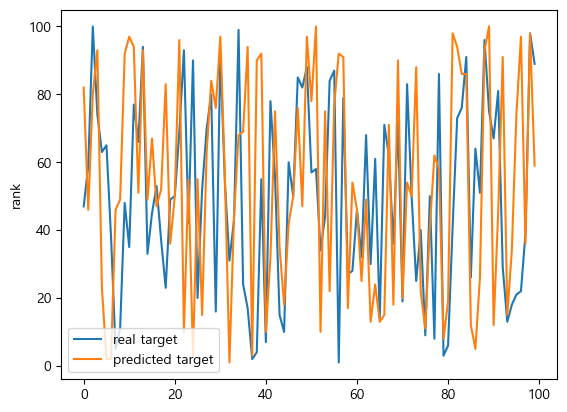

In [144]:
number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [145]:
# 표준화 LDA 적용
lda = LDA(n_components=6)

std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# KNN 모델 적용
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

학습 세트 정확도 :  1.0
검증 세트 정확도 :  -0.769


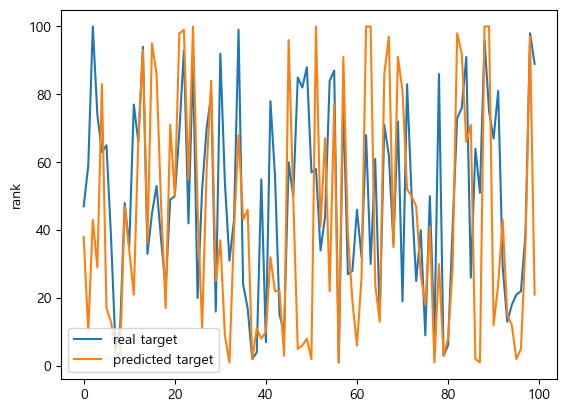

In [146]:
number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

model = KNeighborsRegressor()
# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='r2')
grid_search.fit(X_train_lda, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", grid_search.best_params_)
print("최적의 검증 점수: ", grid_search.best_score_)

최적의 하이퍼파라미터:  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
최적의 검증 점수:  0.6983024145599475


In [26]:
def getBestKNN(X_train, X_test):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors': [16,18,20,22,24],
        'weights': ['uniform'],
        'metric': ['minkowski','euclidean','manhattan'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10,20,30],
        'p': [1]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score : ', grid_search.best_estimator_.score(X_test, y_test))

    return grid_search.best_estimator_

In [ ]:
getBestKNN(X_train_lda, X_test_lda)

학습 세트 정확도 :  0.029
검증 세트 정확도 :  -0.01


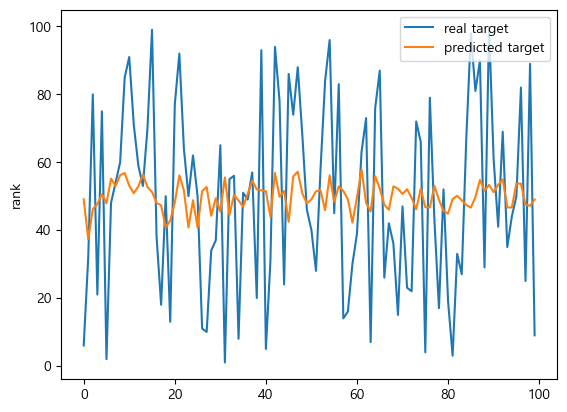

In [121]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso 회귀 모델 적용
model = Lasso(alpha=0.1)  # alpha 값은 필요에 따라 조정할 수 있습니다
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  0.03
검증 세트 정확도 :  -0.012


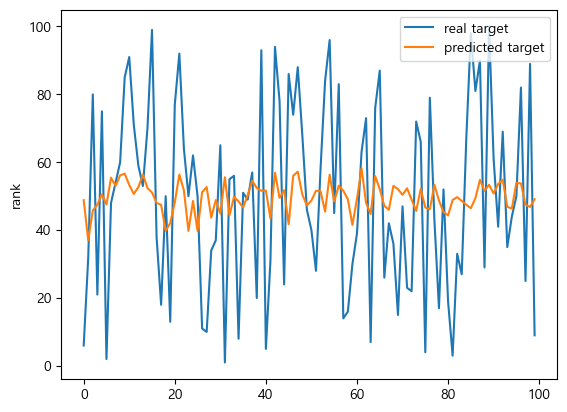

In [122]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge 회귀 모델 적용
model = Ridge(alpha=0.1)  # alpha 값은 필요에 따라 조정할 수 있습니다
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()


Ridge 모델 학습 세트 정확도: 0.03
Ridge 모델 검증 세트 정확도: 0.029
Lasso 모델 학습 세트 정확도: 0.03
Lasso 모델 검증 세트 정확도: 0.029
ElasticNet 모델 학습 세트 정확도: 0.03
ElasticNet 모델 검증 세트 정확도: 0.029


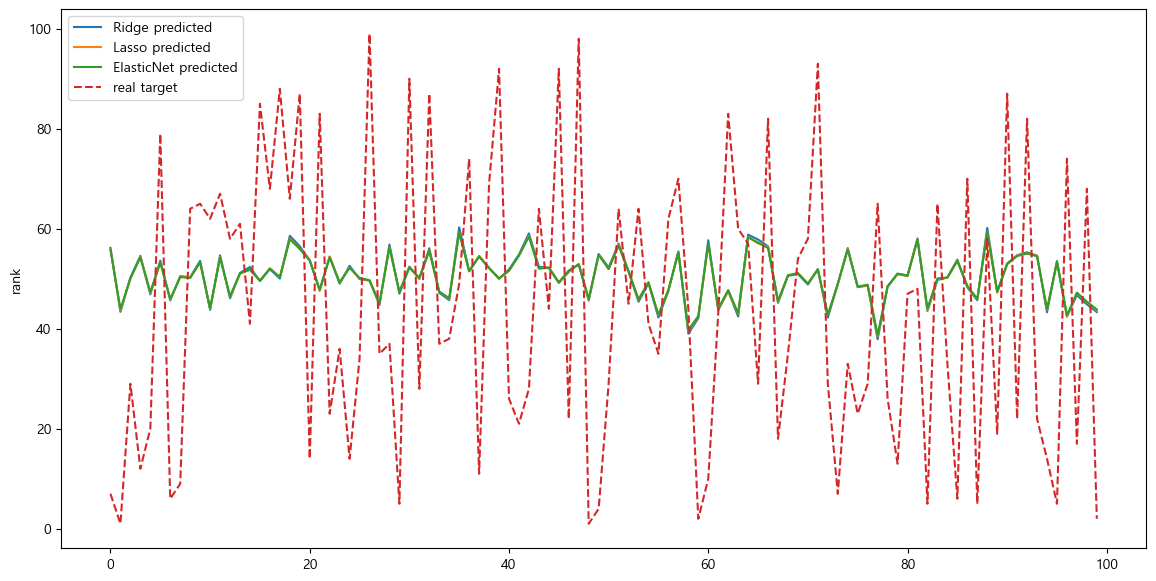

In [130]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 리스트
models = {
    'Ridge': Ridge(alpha=0.1),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio는 L1과 L2 비율을 조정합니다
}

# 결과 저장용 딕셔너리
results = {}

# 모델 학습 및 예측
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_predicted = model.predict(X_test_scaled)
    
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    results[name] = {
        'train_score': train_score,
        'test_score': test_score,
        'y_predicted': y_predicted
    }
    
    print(f'{name} 모델 학습 세트 정확도: {round(train_score, 3)}')
    print(f'{name} 모델 검증 세트 정확도: {round(test_score, 3)}')

# 예측 결과 시각화
number_of_sample = 100
plt.figure(figsize=(14, 7))

for name, result in results.items():
    plt.plot(range(number_of_sample), result['y_predicted'][:number_of_sample], label=f'{name} predicted')

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target', linestyle='--')
plt.ylabel('rank')
plt.legend()
plt.show()


In [ ]:
#이이이이잉

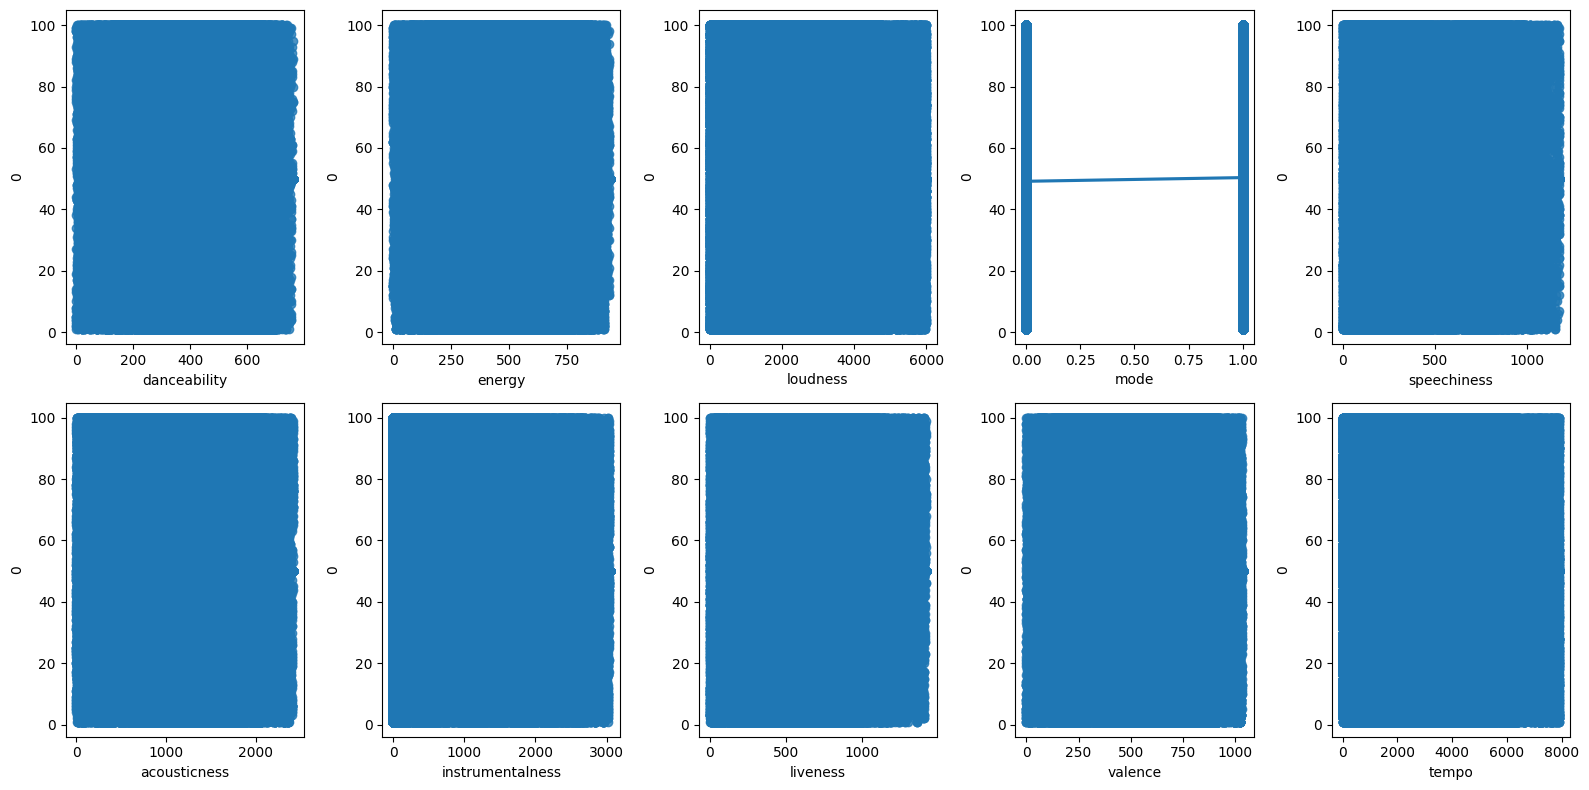

In [53]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # 데이터 병합
# df = pd.concat([data, label], axis=1)

# # 서브플롯 생성
# fig, axs = plt.subplots(figsize=(16, 8), ncols=5, nrows=2)
# features = data.columns

# # 각 feature에 대해 회귀선 그리기
# for i, feature in enumerate(features):
#     row = i // 5
#     col = i % 5
#     sns.regplot(x=feature, y=label.columns[0], data=df, ax=axs[row][col])

# plt.tight_layout()
# plt.show()
# # 각 feature과 label간의 상관관계가 없음.